In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [8]:
df =pd.read_csv('DataSets/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
weight_mean = df['Weight'].mean()
weight_std = df['Weight'].std()
height_mean = df['Height'].mean()
height_std = df['Height'].std()

df['Weight_zscore'] = zscore(df['Weight'])
df['Height_zscore'] = zscore(df['Height'])

print(f"Weight Mean: {weight_mean:.2f}")
print(f"Weight Std Dev: {weight_std:.2f}")
print(f"Height Mean: {height_mean:.2f}")
print(f"Height Std Dev: {height_std:.2f}")


Weight Mean: 161.44
Weight Std Dev: 32.11
Height Mean: 66.37
Height Std Dev: 3.85


In [16]:
#outliers analysis
threeshold = 3
weight_outliers = df[(df['Weight_zscore'].abs() > threeshold)]
height_outlier = df[(df['Height_zscore'].abs() > threeshold)]
all_outliers = pd.concat([weight_outliers, height_outlier]).drop_duplicates()

print(f"Number of outliers in Weight: {len(weight_outliers)}")
print(f"Number of outliers in Height: {len(height_outlier)}")
print(f"Total number of outliers: {len(all_outliers)}")

Number of outliers in Weight: 2
Number of outliers in Height: 7
Total number of outliers: 7


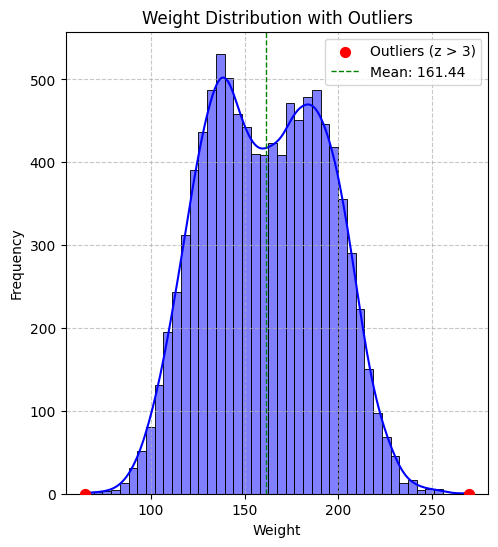

In [21]:
#Plotting for weight graph
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(df['Weight'], kde=True, color='blue')
plt.scatter(weight_outliers['Weight'], [0]*len(weight_outliers), color='red', s = 50, zorder=5, label=f'Outliers (z > {threeshold})')
plt.axvline(weight_mean, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {weight_mean:.2f}')
plt.title('Weight Distribution with Outliers')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

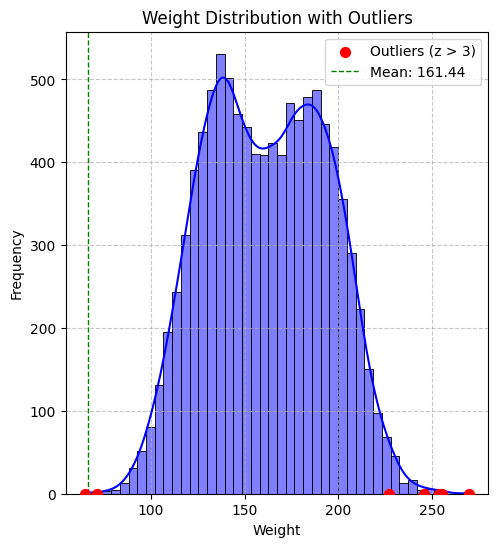

In [22]:
#Plotting for hight graph
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(df['Weight'], kde=True, color='blue')
plt.scatter(height_outlier['Weight'], [0]*len(height_outlier), color='red', s = 50, zorder=5, label=f'Outliers (z > {threeshold})')
plt.axvline(height_mean, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {weight_mean:.2f}')
plt.title('Weight Distribution with Outliers')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

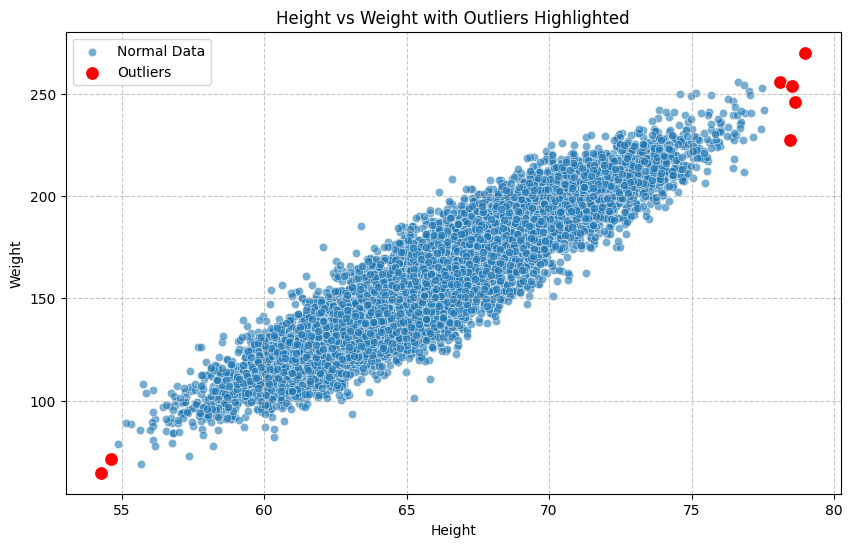

In [ ]:
#scatter plot for weight vs height with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=df, alpha=0.6, label='Normal Data')
sns.scatterplot(x='Height', y='Weight', data=all_outliers, color='red', s=100, label='Outliers', markers='X')
plt.title('Height vs Weight with Outliers Highlighted')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

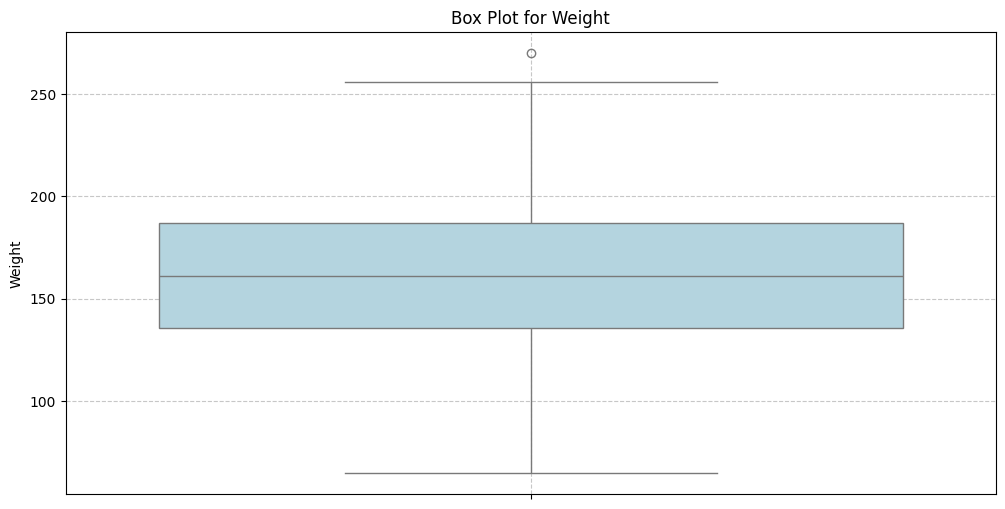

In [ ]:
#box plots for weight 
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['Weight'], color='lightblue')
plt.title('Box Plot for Weight')
plt.ylabel('Weight')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

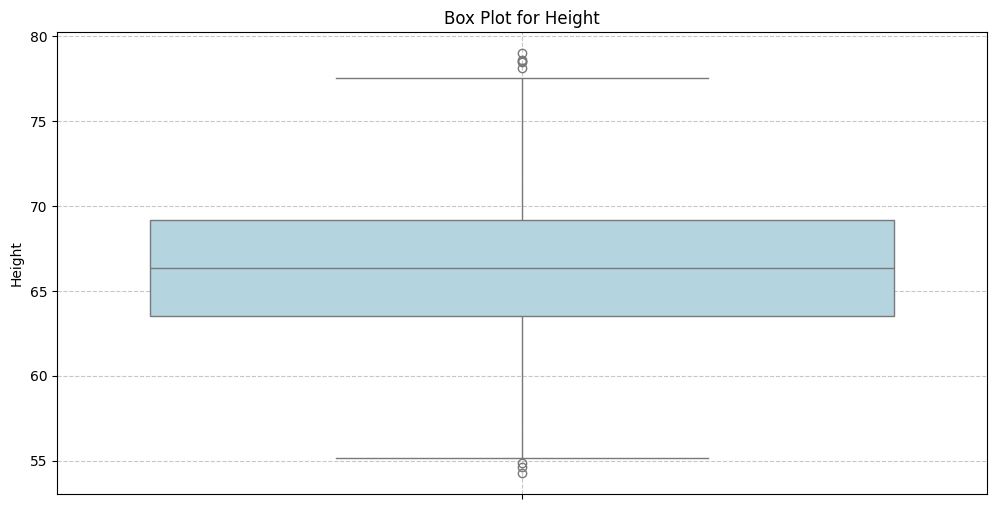

In [26]:
#box plots for height 
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['Height'], color='lightblue')
plt.title('Box Plot for Height')
plt.ylabel('Height')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [27]:
#save modified dataframe to csv
df.to_csv('DataSets/weight-height-zscore.csv')